In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!rm -rf /content/Split_data

In [4]:
!unzip -q '/content/drive/MyDrive/Split_data.zip' -d /content/

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os

In [6]:
training_data_path =  '/content/Split_data/Train/Group_7'
validation_data_path = '/content/Split_data/Validation/Group_7'

In [7]:
os.listdir(training_data_path)

['idli', 'fried_rice', 'ice_cream']

In [8]:
os.listdir(validation_data_path)

['idli', 'fried_rice', 'ice_cream']

In [10]:
os.listdir(training_data_path+'/idli')

['216.jpg',
 'download.jpg',
 '122.jpg',
 '015.jpg',
 '175.jpg',
 '096.jpg',
 '191.jpg',
 '061.jpg',
 '236.jpg',
 '131.jpg',
 '265.jpg',
 '020.jpg',
 '263.jpg',
 '277.jpg',
 '003.jpg',
 '208.jpg',
 '250.jpg',
 '079.jpg',
 '197.jpg',
 '235.jpg',
 '046.jpg',
 '206.jpg',
 '078.jpg',
 '307.jpg',
 'images (4).jpg',
 '088.jpg',
 '297.jpg',
 '057.jpg',
 '220.jpg',
 '132.jpg',
 '070.jpg',
 '092.jpg',
 '048.jpg',
 '167.jpg',
 '075.jpg',
 '022.jpg',
 '209.jpg',
 '111.jpg',
 '184.jpg',
 '089.jpg',
 '077.jpg',
 '284.jpg',
 '006.jpg',
 '244.jpg',
 '102.jpg',
 '180.jpg',
 '238.jpg',
 '302.jpg',
 '170.jpg',
 '124.jpg',
 '104.jpg',
 '010.jpg',
 '069.jpg',
 '049.jpg',
 '009.jpg',
 '172.jpg',
 '012.jpg',
 'images (15).jpg',
 '126.jpg',
 '085.jpg',
 '230.jpg',
 '153.jpg',
 '177.jpg',
 '027.jpg',
 '260.jpg',
 'images (7).jpg',
 'images (12).jpg',
 '196.jpg',
 '185.jpg',
 '140.jpg',
 '300.jpg',
 '101.jpg',
 '286.jpg',
 '159.jpg',
 '164.jpg',
 '004.jpg',
 '268.jpg',
 '261.jpg',
 '118.jpg',
 '259.jpg',
 '054

In [11]:
os.listdir(training_data_path+'/fried_rice')

['332.jpg',
 '096.jpg',
 '333.jpg',
 '131.jpg',
 '105.jpg',
 '143.jpg',
 '144.jpg',
 '316.jpg',
 '263.jpg',
 '087.jpg',
 '202.jpg',
 '343.jpg',
 '003.jpg',
 '298.jpg',
 '262.jpg',
 '065.jpg',
 '152.jpg',
 '079.jpg',
 '235.jpg',
 '008.jpg',
 '178.jpg',
 '179.jpg',
 '116.jpg',
 'images (4).jpg',
 '088.jpg',
 '287.jpg',
 '291.jpg',
 '057.jpg',
 '053.jpg',
 '220.jpg',
 '317.jpg',
 '132.jpg',
 '320.jpg',
 '048.jpg',
 '146.jpg',
 '209.jpg',
 '089.jpg',
 '077.jpg',
 '102.jpg',
 '315.jpg',
 '302.jpg',
 '170.jpg',
 '124.jpg',
 '040.jpg',
 '233.jpg',
 'download (3).jpg',
 '339.jpg',
 'images (2).jpg',
 '230.jpg',
 '338.jpg',
 '280.jpg',
 '093.jpg',
 '137.jpg',
 '103.jpg',
 '310.jpg',
 'images (7).jpg',
 'images (12).jpg',
 '196.jpg',
 '100.jpg',
 '101.jpg',
 '159.jpg',
 '029.jpg',
 '095.jpg',
 '127.jpg',
 '247.jpg',
 '225.jpg',
 'images (11).jpg',
 '246.jpg',
 '130.jpg',
 '335.jpg',
 'download (4).jpg',
 '068.jpg',
 '107.jpg',
 '081.jpg',
 '169.jpg',
 '076.jpg',
 '154.jpg',
 '044.jpg',
 '305.jpg

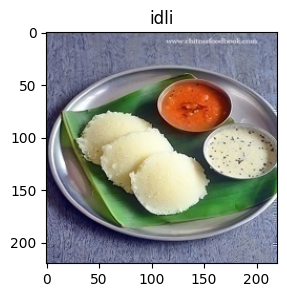

In [13]:
plt.figure(figsize=(5,3))
plt.title('idli')
Baked_potato = plt.imread(training_data_path + '/idli/009.jpg')
plt.imshow(Baked_potato)
plt.show()

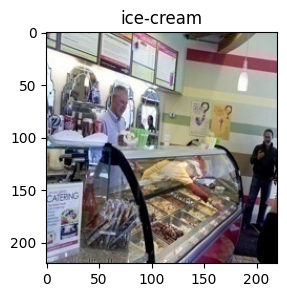

In [14]:
plt.figure(figsize=(5,3))
plt.title('ice-cream')
Donut = plt.imread(training_data_path + '/ice_cream/1101126.jpg')
plt.imshow(Donut)
plt.show()

**Image Data Augumentation**

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
training_set = ImageDataGenerator(rescale = 1 / 255,
                                  rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

validation_set = ImageDataGenerator(rescale = 1 / 255,rotation_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

In [18]:
labels =  ['idli', 'fried_rice', 'ice_cream']

In [19]:
train_input_data = training_set.flow_from_directory(training_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 30)

val_input_data = validation_set.flow_from_directory(validation_data_path,
                                 classes = labels,
                                 target_size=(256,256),
                                 class_mode = 'categorical',
                                 batch_size = 30)

Found 360 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [20]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.activations import relu,sigmoid,softmax
from tensorflow.keras.applications import VGG16

In [21]:
import warnings
warnings.filterwarnings('ignore')

# Model architecture

model = Sequential()

# 1st Filter (or) Hidden layer
model.add(Conv2D(64, kernel_size=(3,3), kernel_initializer='he_uniform', padding='valid', strides=1, input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Filter (or) Hidden layer
model.add(Conv2D(32 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Filter (or) Hidden layer
model.add(Conv2D(8 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

# 4th Filter (or) Hidden layer
model.add(Conv2D(4 , kernel_size = (3,3), kernel_initializer='he_uniform',padding='valid',strides = 1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(2,kernel_initializer='he_uniform',activation='relu'))

model.add(Dense(1,kernel_initializer='he_uniform',activation='sigmoid'))

In [22]:
num_classes = 3
vgg_model = VGG16(input_shape=(256, 256, 3),
                  weights='imagenet',
                  include_top=False)

# Freeze base model layers so only top layers train
for layer in vgg_model.layers:
    layer.trainable = False

# Flatten and add fully connected layers
x = Flatten()(vgg_model.output)
h1_out = Dense(units=128, kernel_initializer='he_uniform', activation='relu')(x)
h2_out = Dense(units=16, kernel_initializer='he_uniform', activation='relu')(h1_out)

# Final output layer for 3 classes
output = Dense(units=num_classes, kernel_initializer='glorot_uniform', activation='softmax')(h2_out)

# Create the final model
model = Model(inputs=vgg_model.input, outputs=output)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [23]:
vgg_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [24]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [25]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_input_data,
    epochs=50,
    validation_data=val_input_data
)


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 771ms/step - accuracy: 0.4028 - loss: 1.1625 - val_accuracy: 0.8083 - val_loss: 0.6013
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 988ms/step - accuracy: 0.8454 - loss: 0.4609 - val_accuracy: 0.8667 - val_loss: 0.3725
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 735ms/step - accuracy: 0.9001 - loss: 0.2777 - val_accuracy: 0.8833 - val_loss: 0.3046
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 851ms/step - accuracy: 0.9555 - loss: 0.1789 - val_accuracy: 0.9083 - val_loss: 0.2797
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 638ms/step - accuracy: 0.9675 - loss: 0.1432 - val_accuracy: 0.9000 - val_loss: 0.2771
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9750 - loss: 0.1233 - val_accuracy: 0.9083 - val_loss: 0.2706
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 975ms/step - accuracy: 0.9815 - loss: 0.0902 - val_accuracy: 0.9250 - val_loss: 0.2397
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 925ms/step - accuracy: 0.9932 - loss: 0.0659 - val_accuracy:

**test_model**

In [26]:
import cv2

In [27]:
labels

['idli', 'fried_rice', 'ice_cream']

In [28]:
train_input_data.class_indices

{'idli': 0, 'fried_rice': 1, 'ice_cream': 2}

In [29]:
def fun(path):
    global model, train_input_data

    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    # --- 1. Load and preprocess the image ---
    img_bgr = cv2.imread(path)
    if img_bgr is None:
        raise FileNotFoundError(f"Image not found: {path}")

    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img_rgb, (256, 256))
    normalized = resized / 255.0
    input_image = np.expand_dims(normalized, axis=0)

    # --- 2. Predict using the model ---
    pred = model.predict(input_image, verbose=0)

    # --- 3. Get class mapping dynamically ---
    # Automatically adapts to whatever classes your train_input_data has
    mapping = train_input_data.class_indices
    inv_map = {v: k for k, v in mapping.items()}

    # --- 4. Get predicted class ---
    predicted_index = int(np.argmax(pred))
    predicted_label = inv_map.get(predicted_index, "Unknown Class")

    # --- 5. Debugging info ---
    print("\nGroup class mapping:", mapping)
    print("Model output probabilities:", np.round(pred, 3))
    print(f"Predicted class index: {predicted_index}")
    print(f"Predicted label: {predicted_label}\n")

    # --- 6. Display image with prediction ---
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_label}")
    plt.show()



Group class mapping: {'idli': 0, 'fried_rice': 1, 'ice_cream': 2}
Model output probabilities: [[0.    0.001 0.999]]
Predicted class index: 2
Predicted label: ice_cream



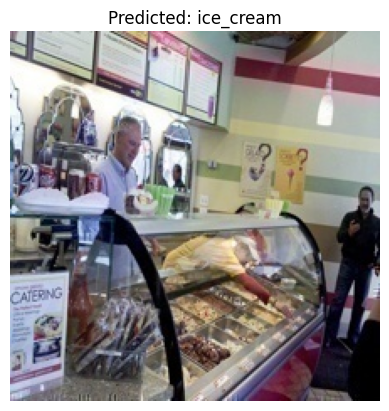

In [30]:
fun('/content/Split_data/Train/Group_7/ice_cream/1101126.jpg')


Group class mapping: {'idli': 0, 'fried_rice': 1, 'ice_cream': 2}
Model output probabilities: [[1. 0. 0.]]
Predicted class index: 0
Predicted label: idli



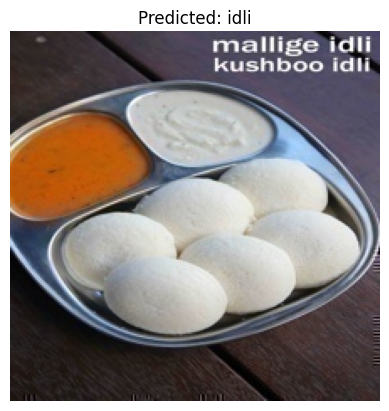

In [31]:
fun('/content/Split_data/Train/Group_7/idli/004.jpg')

In [32]:
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [33]:
test_data_path = '/content/Split_data/Test/Group_7'

In [34]:
labels = ['idli', 'fried_rice', 'ice_cream']

In [35]:
test_set = ImageDataGenerator(rescale=1./255)

test_input_data = test_set.flow_from_directory(
    test_data_path,
    classes=labels,
    target_size=(256,256),
    class_mode='categorical',
    batch_size=10,
    shuffle=False
)


Found 120 images belonging to 3 classes.


In [36]:
test_input_data.reset()
predictions = model.predict(test_input_data, verbose=1)


12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step


In [37]:
from sklearn.metrics import classification_report, accuracy_score

In [38]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_input_data.classes

In [39]:
y_pred = y_pred.astype(int)
y_true = y_true.astype(int)

In [40]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(test_input_data.class_indices.keys())))


Classification Report:

              precision    recall  f1-score   support

        idli       0.97      0.97      0.97        40
  fried_rice       0.97      0.97      0.97        40
   ice_cream       0.95      0.95      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [41]:
accuracy = accuracy_score(y_true, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9667


In [43]:
from tensorflow.keras.models import load_model
model.save('/content/vgg16_group7.h5')
model = load_model('/content/vgg16_group7.h5')
